# Guided Project: Popular Data Science Questions

In this project, we'll work on [The Data Science Stack Exchange website (DSSE)](https://datascience.stackexchange.com/), to determine which topics are most popular/asked about.

Stack Exchange provides a public data base for each of its websites. [Here](https://data.stackexchange.com/datascience/query/new)'s a link to query and explore Data Science Stack Exchange's database.

## Stack Exchange Data Explorer 

After looking at some tables in the database, these look promising :
* Posts
* PostTags
* Tags

We can also use the table PostTypes to get the post type from the **PostTypeId** column in Posts.

We'll focus on these columns : 
* **Id** : An identification number for the post.
* **PostTypeId** : An identification number for the type of post.
* **CreationDate** : The date and time of creation of the post.
* **Score** : The post's score.
* **ViewCount** : How many times the post was viewed.
* **Tags** : What tags were used.
* **AnswerCount** : How many answers the question got (only applicable to question posts).
* **FavoriteCount** : How many times the question was favored (only applicable to question posts).

We're only going to focus on question posts of 2019.

## Getting the data

To get the data, we run the following query :

    select Id, PostTypeId, CreationDate, 
           Score, ViewCount, Tags, 
           AnswerCount, FavoriteCount 
    from Posts
    where PostTypeId = 1 AND YEAR(CreationDate) = 2019;

## Exploring the data

In [11]:
import pandas as pd

data = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [12]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


We can already see some missing values. Let's inspect them.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We can see that **FavoriteCount** is the only column with missing values, counting 7432 null value. This means that these questions don't appear in anyone's favorites. We can change these values to 0.

## Data Cleaning

In [14]:
data["FavoriteCount"].fillna(0, inplace=True)
data["FavoriteCount"] = data["FavoriteCount"].astype(int)

In [15]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


In [16]:
data["Tags"] = data["Tags"].str.replace("^<|>$", "").str.split("><")

In [17]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


## Most used & most viewed Tags

We'll start by counting how many times each tag was used.

In [18]:
tag_count = dict()

for tags in data["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [19]:
tag_count = pd.DataFrame.from_dict(tag_count,orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
most_used = tag_count.sort_values("Count", ascending=True).tail(20)

In [20]:
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


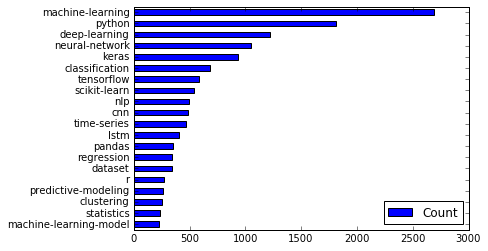

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
most_used.plot(kind="barh")

Now, we'll count views per tag.

In [22]:
tag_views = {}

for i, tags in enumerate(data["Tags"]):
    for tag in tags:
        if tag in tag_views:
            tag_views[tag]+= data["ViewCount"].iloc[i]
        else:
            tag_views[tag]=1

In [23]:
tag_view_count = pd.DataFrame.from_dict(tag_views, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

In [24]:
most_viewed

,ViewCount
clustering,33824
csv,38453
pytorch,39887
dataset,43133
numpy,48556
regression,49427
time-series,62484
cnn,69766
nlp,71278
lstm,74407


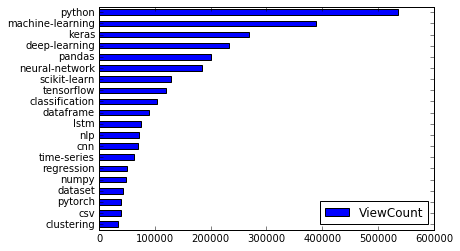

In [25]:
most_viewed.plot(kind="barh")

We notice that most tags in **most_used** appear in **most_viewed**. Let's see what tags are not in **most_viewed**.

In [26]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)

In [27]:
in_used

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33824.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43133.0
regression,347,49427.0
pandas,354,200576.0
lstm,402,74407.0
time-series,466,62484.0


And tags that are not in **most_used**.

In [28]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

In [29]:
in_viewed

,Count,ViewCount
clustering,257.0,33824
csv,NaN,38453
pytorch,NaN,39887
dataset,340.0,43133
numpy,NaN,48556
regression,347.0,49427
time-series,466.0,62484
cnn,489.0,69766
nlp,493.0,71278
lstm,402.0,74407


## Relationships between tags

### From the [solution](https://github.com/dataquestio/solutions/blob/master/Mission469Solutions.ipynb)

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

In [30]:
all_tags = list(tag_count.index)

In [31]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)

In [33]:
associations.fillna(0, inplace=True)

for tags in data["Tags"]:
    associations.loc[tags, tags] += 1

In [34]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [35]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

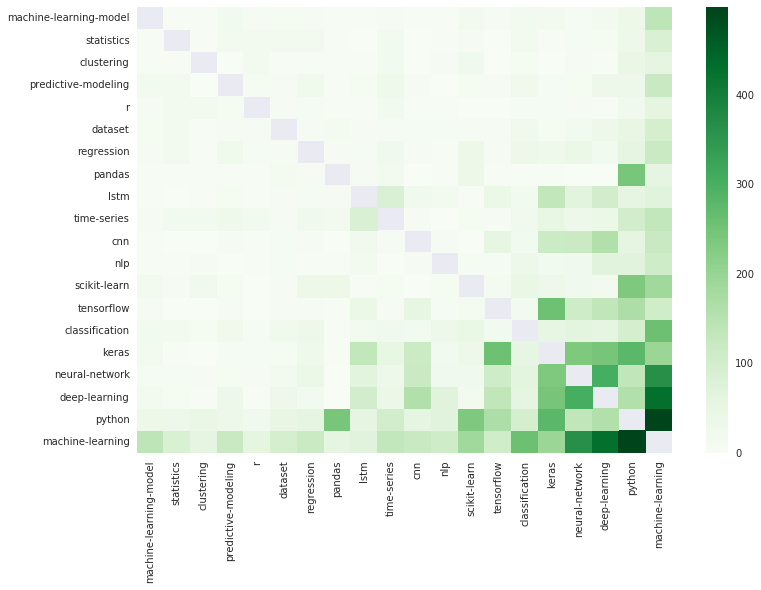

In [37]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

## Is deep learning just a fad ?

In this we will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [40]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [41]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [42]:
all_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


### Transforming the tags column

In [43]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


In [44]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [50]:
all_q["Tags"]

0            [python, keras, tensorflow, cnn, probability]
1                                         [neural-network]
2                            [python, ibm-watson, chatbot]
3                                                  [keras]
4        [r, predictive-modeling, machine-learning-mode...
5                                                    [cnn]
6                             [machine-learning, learning]
7                                       [machine-learning]
8                        [python, keras, tensorflow, lstm]
9                 [neural-network, feature-selection, mlp]
10               [predictive-modeling, recommender-system]
11                         [python, classification, keras]
12                                [python, neural-network]
13                                      [python, anaconda]
14          [python, neural-network, deep-learning, keras]
15                   [python, scikit-learn, random-forest]
16       [data-mining, time-series, lstm, rnn, data-cle.

In [51]:
# identify deep learning questions

def is_dl(tags):
    for tag in tags:
        if tag in ["keras", "cnn", "tensorflow", "neural-network", "lstm", "deep-learning", "rnn", "scikit-learn"]:
            return 1
        else:
            return 0

In [52]:
all_q["DL"] = all_q["Tags"].apply(is_dl)

In [61]:
all_q.sample(5)

,Id,CreationDate,Tags,DL
8584,28269,2018-02-24 20:00:00,"[machine-learning, python, natural-language-pr...",0
12568,51860,2019-05-13 02:44:35,"[keras, cnn, lstm, image-classification, trans...",1
17684,32515,2018-06-01 19:52:45,"[time-series, methodology, methods]",0
10469,19620,2017-06-11 02:39:27,"[data-mining, dataset, preprocessing]",0
2603,56493,2019-07-27 17:25:56,"[machine-learning, classification, scikit-lear...",0


Let's track interest in deep learning before 2020.

In [62]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [64]:
# get the quarter
def get_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(get_quarter)

In [65]:
all_q.sample(5)

,Id,CreationDate,Tags,DL,Quarter
8216,41056,2018-11-11 19:22:06,"[machine-learning, neural-network, keras]",0,18Q4
5269,26813,2018-01-19 04:05:24,"[dataset, image-classification, overfitting, cnn]",0,18Q1
2951,46780,2019-03-06 11:43:50,"[classification, categorical-data, word-embedd...",0,19Q1
6625,58277,2019-08-27 15:54:09,"[time-series, predictive-modeling, cnn, anomal...",0,19Q3
18222,12344,2016-06-22 11:13:57,"[machine-learning, classification, data-mining...",0,16Q2


In [67]:
q_per_quarter = all_q.groupby(["Quarter"]).agg({"DL":["sum", "size"]})

In [68]:
q_per_quarter.columns = ["DLquestions", "totalq"]

In [69]:
q_per_quarter["rate"] = q_per_quarter["DLquestions"] / q_per_quarter["totalq"]

In [70]:
q_per_quarter.reset_index(inplace=True)

In [71]:
q_per_quarter.sample(5)

,Quarter,DLquestions,totalq,rate
22,19Q4,415,2036,0.203831
9,16Q3,70,585,0.119658
17,18Q3,332,1512,0.219577
19,19Q1,411,1987,0.206844
16,18Q2,269,1448,0.185773


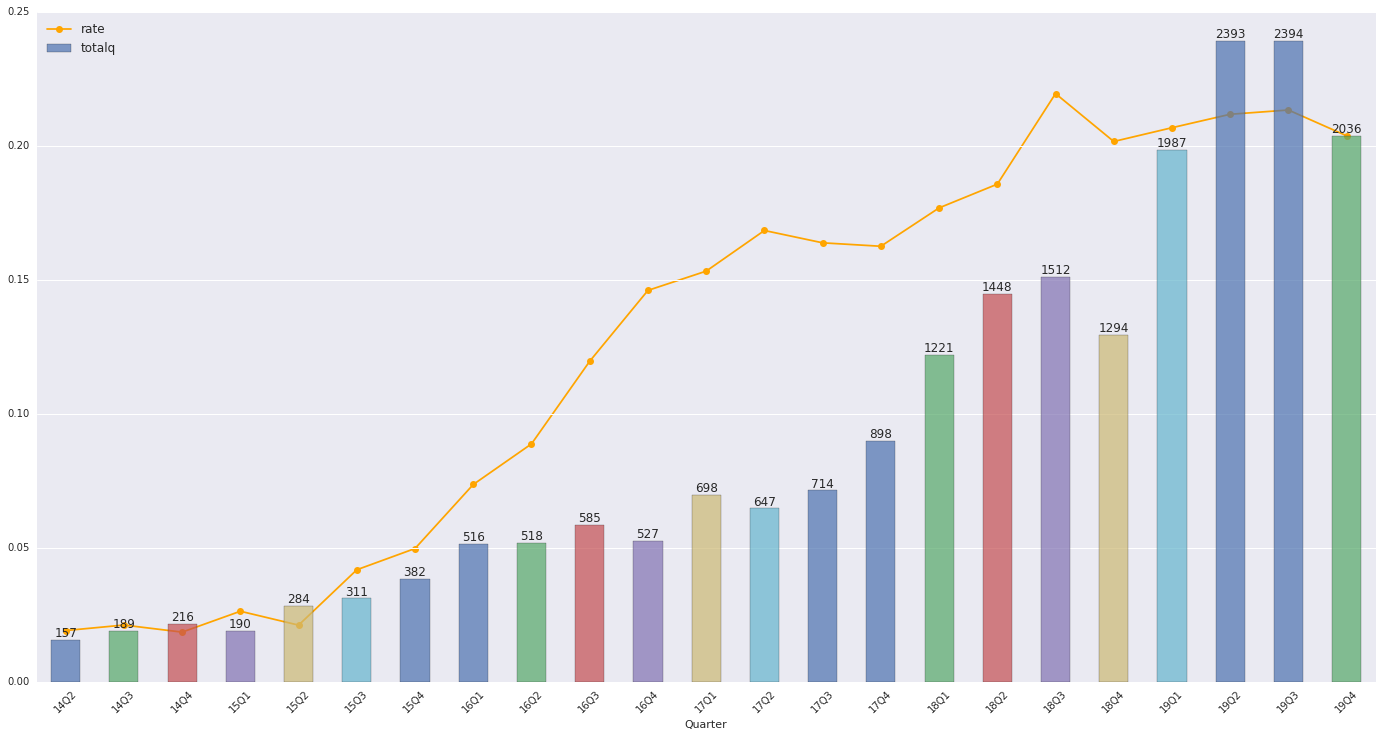

In [73]:
ax1 = q_per_quarter.plot(x="Quarter", y="rate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = q_per_quarter.plot(x="Quarter", y="totalq",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(q_per_quarter["totalq"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It looks like interest in deep learning has been increasing since the beginning of DSSE. However, it seems like the interest is plateauing. Since there is no sign of decreasing interest, we continue with the idea of making deep learing content